# Introduction

If you have some background in machine learning and you'd like to learn how to quickly improve the quality of your models, you're in the right place! In this course, you will accelerate your machine learning expertise by learning how to:

* tackle data types often found in real-world datasets (__missing values__, __categorical variables__),
* design __pipelines__ to improve the quality of your machine learning code,
* use advanced techniques for model validation (__cross-validation__),
* build state-of-the-art models that are widely used to win Kaggle competitions (__XGBoost__), and
* avoid common and important data science mistakes (__leakage__).

Along the way, you'll apply your knowledge by completing a hands-on exercise with real-world data for each new topic. The hands-on exercises use data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course), where you'll use 79 different explanatory variables (such as the type of roof, number of bedrooms, and number of bathrooms) to predict home prices. You'll measure your progress by submitting predictions to this competition and watching your position rise on the [leaderboard!](https://www.kaggle.com/c/home-data-for-ml-course/leaderboard)

## Exercise

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_full = pd.read_csv("train.csv", index_col="Id")
X_test_full = pd.read_csv("test.csv", index_col="Id")

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [2]:
X_train.head()

LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
Id                                                                    
619    11694       2007      1828         0         2             3   
871     6600       1962       894         0         1             2   
93     13360       1921       964         0         1             2   
818    13265       2002      1689         0         2             3   
303    13704       2001      1541         0         2             3   

     TotRmsAbvGrd  
Id                 
619             9  
871             5  
93              5  
818             7  
303             6

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below. This function returns the mean absolute error (MAE) from the validation set. Recall that the best model will obtain the lowest MAE. (To review mean absolute error, [look here](https://www.kaggle.com/code/dansbecker/model-validation/tutorial).)

In [4]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


### Step 1: Evaluate several models

Use the above results to fill in the line below. Which model is the best model? Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [5]:
# Fill in the best model
best_model = model_3

### Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [6]:
my_model = RandomForestRegressor()

Run the next code cell without changes.  The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file.  These test predictions can be submitted directly to the competition!

In [7]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Missing Values

## Lecture

There are many ways data can end up with missing values. For example,

* A 2 bedroom house won't include a value for the size of a third bedroom.
* A survey respondent may choose not to share his income.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.

__Three Approaches__
1) A Simple Option: Drop Columns with Missing Values

    The simplest option is to drop columns with missing values.
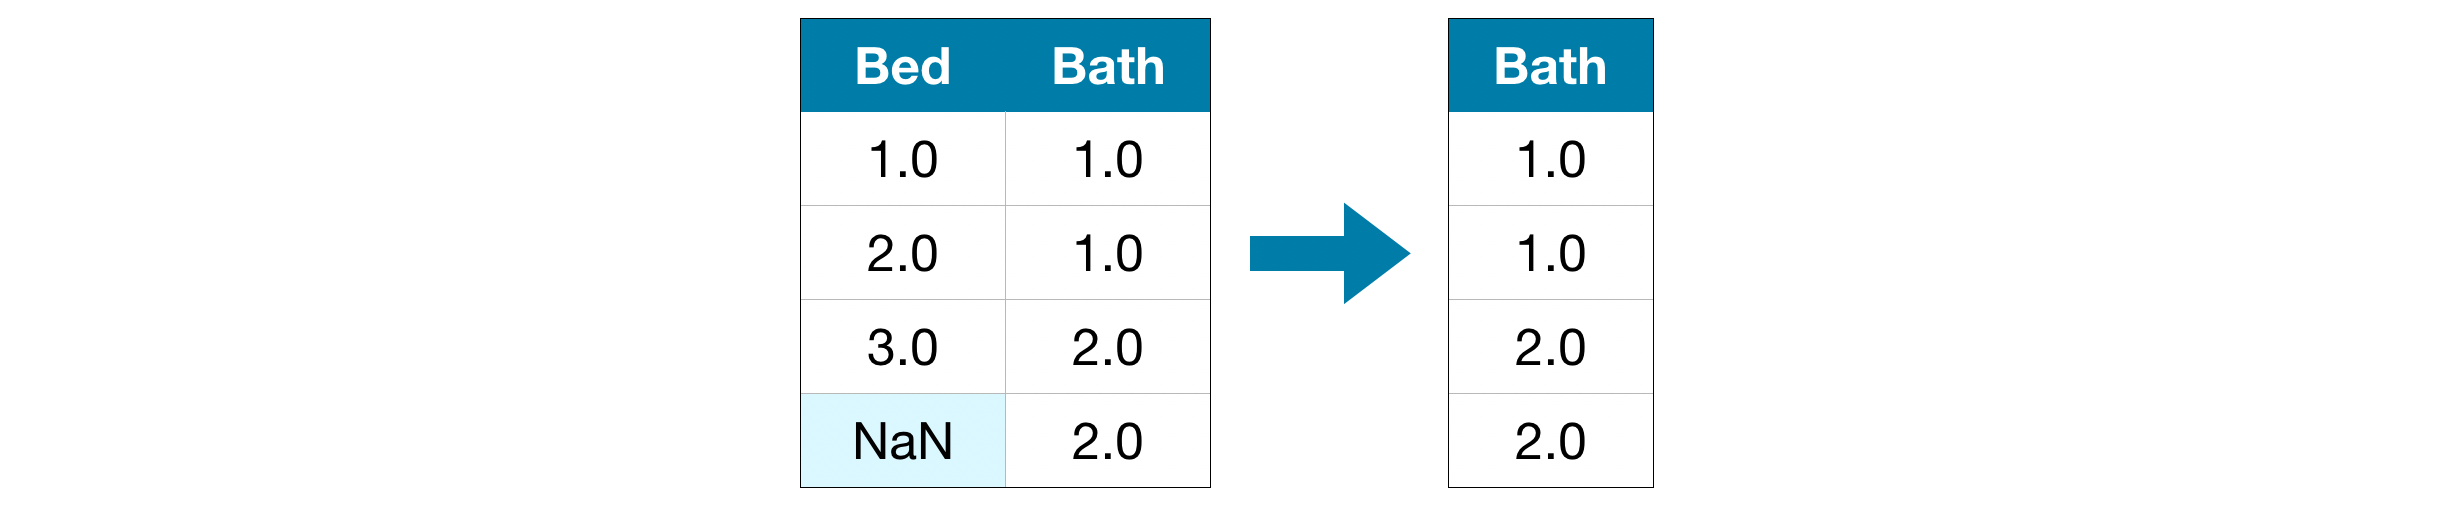
Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!

2) A Better Option: Imputation

    Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.
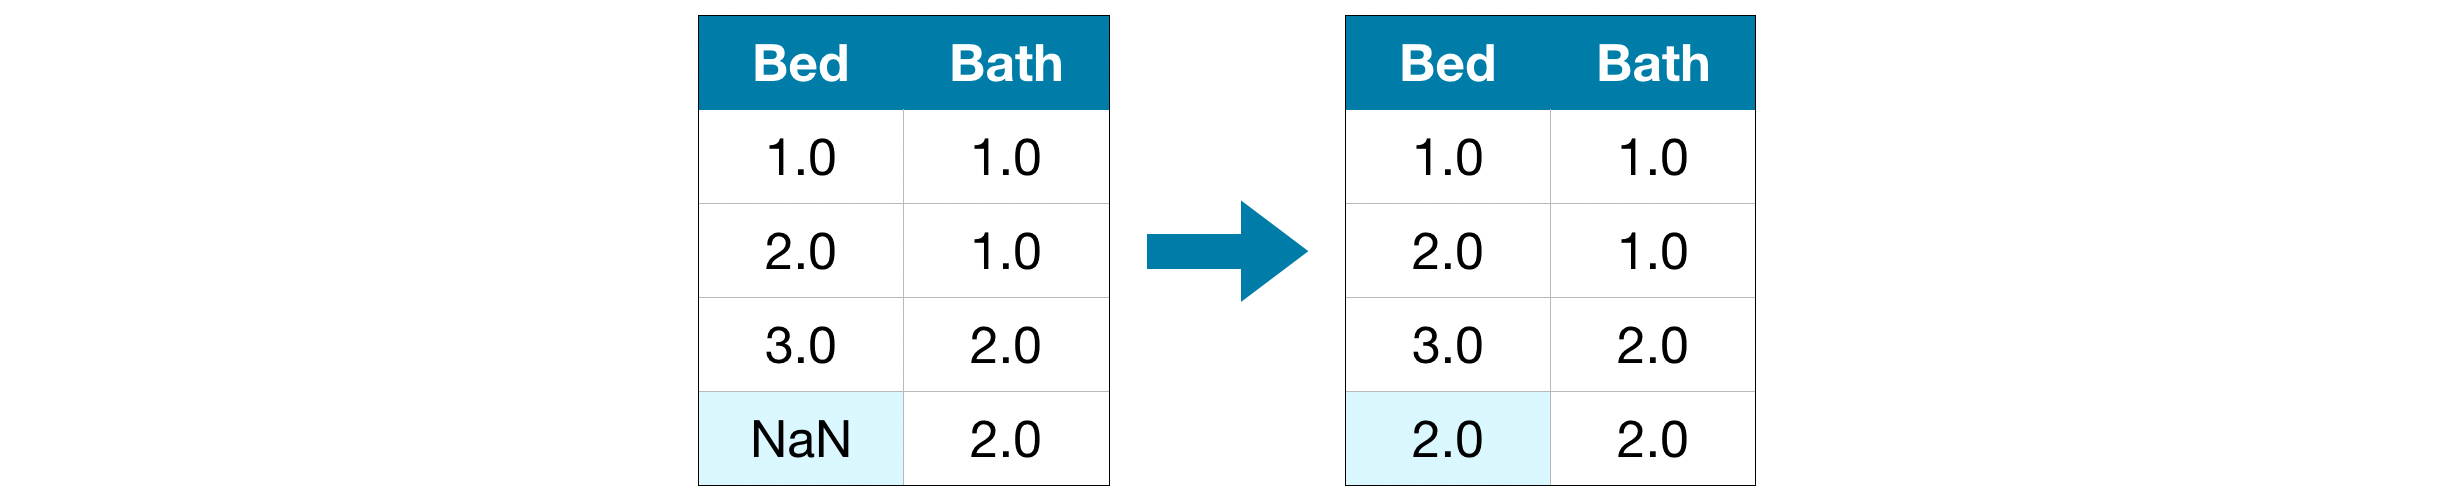
The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

3) An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.
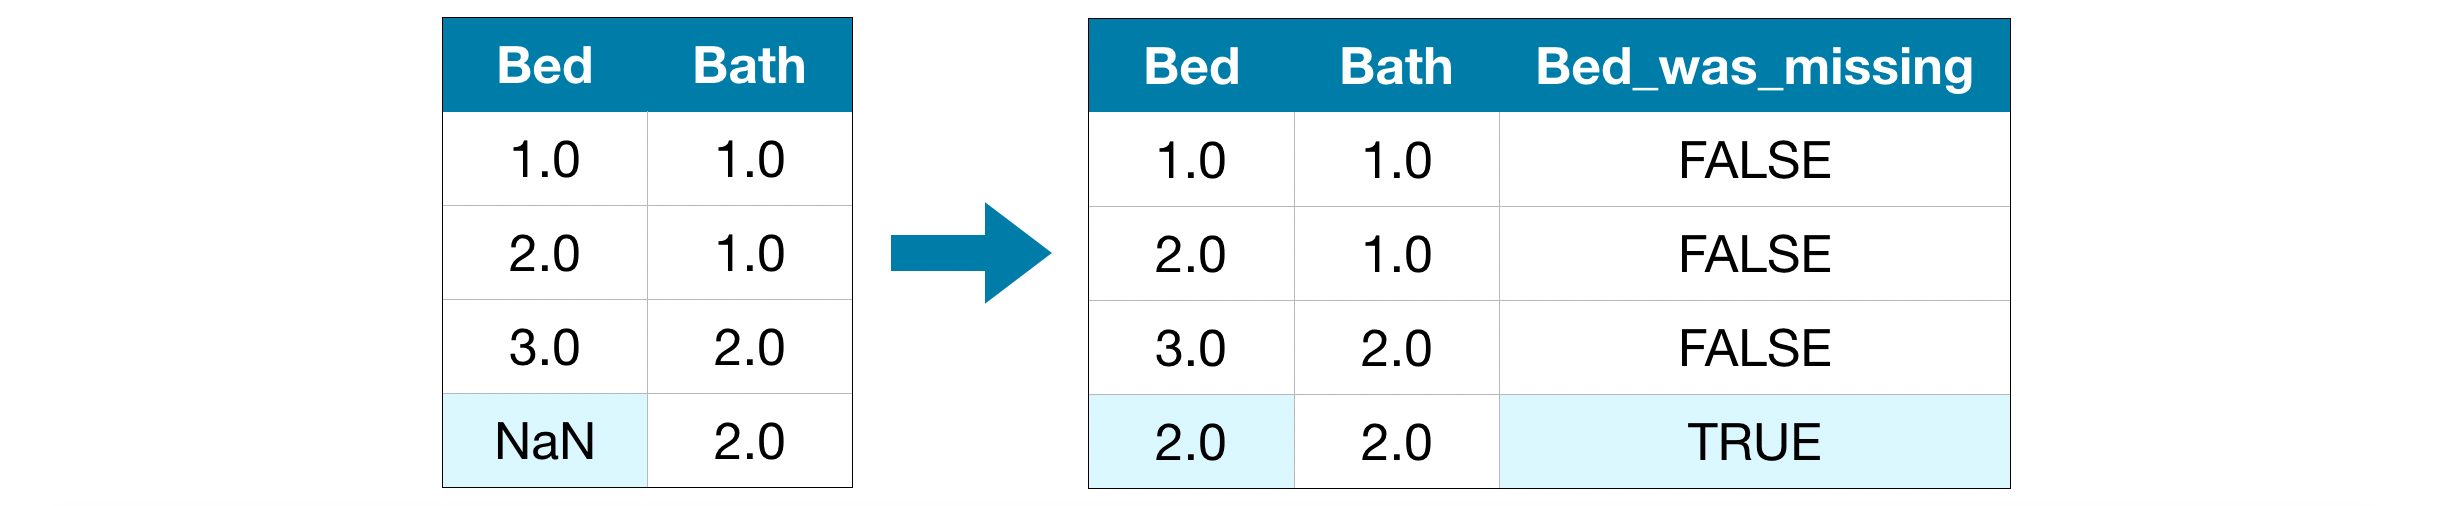

__Example__
In the example, we will work with the Melbourne Housing dataset. Our model will use information such as the number of rooms and land size to predict home price.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in `X_train`, `X_valid`, `y_train`, and `y_valid`.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("melb_data.csv")

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])
X

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0          2       2.5    3067.0       2.0       1.0  1.0     202.0   
1          2       2.5    3067.0       2.0       1.0  0.0     156.0   
2          3       2.5    3067.0       3.0       2.0  0.0     134.0   
3          3       2.5    3067.0       3.0       2.0  1.0      94.0   
4          4       2.5    3067.0       3.0       1.0  2.0     120.0   
...      ...       ...       ...       ...       ...  ...       ...   
13575      4      16.7    3150.0       4.0       2.0  2.0     652.0   
13576      3       6.8    3016.0       3.0       2.0  2.0     333.0   
13577      3       6.8    3016.0       3.0       2.0  4.0     436.0   
13578      4       6.8    3016.0       4.0       1.0  5.0     866.0   
13579      4       6.3    3013.0       4.0       1.0  1.0     362.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
0               NaN        NaN  -37.79960   144.99840         4019.0  
1              79.0     1900.0  -37.80790   144.99340         4019.0  
2             150.0     1900.0  -37.80930   144.99440         4019.0  
3               NaN        NaN  -37.79690   144.99690         4019.0  
4             142.0     2014.0  -37.80720   144.99410         4019.0  
...             ...        ...        ...         ...            ...  
13575           NaN     1981.0  -37.90562   145.16761         7392.0  
13576         133.0     1995.0  -37.85927   144.87904         6380.0  
13577           NaN     1997.0  -37.85274   144.88738         6380.0  
13578         157.0     1920.0  -37.85908   144.89299         6380.0  
13579         112.0     1920.0  -37.81188   144.88449         6543.0  

[13580 rows x 12 columns]

In [9]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Define Function to Measure Quality of Each Approach
We define a function score_dataset() to compare different approaches to dealing with missing values. This function reports the mean absolute error (MAE) from a random forest model.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Score from Approach 1 (Drop Columns with Missing Values)

Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [11]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [12]:
for col in X_train.columns:
    if X_train[col].isnull().any():
        print(col)

Car
BuildingArea
YearBuilt


In [13]:
# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


### Score from Approach 2 (Imputation)

Next, we use `SimpleImputer` to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as __regression imputation__, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [17]:
X_train.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12167      1       5.0    3182.0       1.0       1.0  1.0       0.0   
6524       2       8.0    3016.0       2.0       2.0  1.0     193.0   
8413       3      12.6    3020.0       3.0       1.0  1.0     555.0   
2919       3      13.0    3046.0       3.0       1.0  1.0     265.0   
6043       3      13.3    3020.0       3.0       1.0  2.0     673.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
12167           NaN     1940.0  -37.85984    144.9867        13240.0  
6524            NaN        NaN  -37.85800    144.9005         6380.0  
8413            NaN        NaN  -37.79880    144.8220         3755.0  
2919            NaN     1995.0  -37.70830    144.9158         8870.0  
6043          673.0     1970.0  -37.76230    144.8272         4217.0

In [18]:
X_valid.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
8505       4       8.0    3016.0       4.0       2.0  2.0     450.0   
5523       2       6.6    3011.0       2.0       1.0  0.0     172.0   
12852      3      10.5    3020.0       3.0       1.0  1.0     581.0   
4818       3       4.5    3181.0       2.0       2.0  1.0     128.0   
12812      3       8.5    3044.0       3.0       2.0  2.0     480.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
8505          190.0     1910.0  -37.86100   144.89850         6380.0  
5523           81.0     1900.0  -37.81000   144.88960         2417.0  
12852           NaN        NaN  -37.76740   144.82421         4217.0  
4818          134.0     2000.0  -37.85260   145.00710         7717.0  
12812           NaN        NaN  -37.72523   144.94567         7485.0

In [45]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

In [52]:
# custom test
test = pd.DataFrame(my_imputer.transform(X_train))
test.head()

0     1       2    3    4    5      6           7            8         9   \
0  1.0   5.0  3182.0  1.0  1.0  1.0    0.0  153.764119  1940.000000 -37.85984   
1  2.0   8.0  3016.0  2.0  2.0  1.0  193.0  153.764119  1964.839866 -37.85800   
2  3.0  12.6  3020.0  3.0  1.0  1.0  555.0  153.764119  1964.839866 -37.79880   
3  3.0  13.0  3046.0  3.0  1.0  1.0  265.0  153.764119  1995.000000 -37.70830   
4  3.0  13.3  3020.0  3.0  1.0  2.0  673.0  673.000000  1970.000000 -37.76230   

         10       11  
0  144.9867  13240.0  
1  144.9005   6380.0  
2  144.8220   3755.0  
3  144.9158   8870.0  
4  144.8272   4217.0

In [51]:
imputed_X_train.equals(test)

True

In [37]:
my_imputer.fit_transform(X_train)

array([[ 1.0000000e+00,  5.0000000e+00,  3.1820000e+03, ...,
        -3.7859840e+01,  1.4498670e+02,  1.3240000e+04],
       [ 2.0000000e+00,  8.0000000e+00,  3.0160000e+03, ...,
        -3.7858000e+01,  1.4490050e+02,  6.3800000e+03],
       [ 3.0000000e+00,  1.2600000e+01,  3.0200000e+03, ...,
        -3.7798800e+01,  1.4482200e+02,  3.7550000e+03],
       ...,
       [ 4.0000000e+00,  6.7000000e+00,  3.0580000e+03, ...,
        -3.7735720e+01,  1.4497256e+02,  1.1204000e+04],
       [ 3.0000000e+00,  1.2000000e+01,  3.0730000e+03, ...,
        -3.7720570e+01,  1.4502615e+02,  2.1650000e+04],
       [ 4.0000000e+00,  6.4000000e+00,  3.0110000e+03, ...,
        -3.7794300e+01,  1.4488750e+02,  7.5700000e+03]])

In [25]:
# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [26]:
imputed_X_train.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0    1.0       5.0    3182.0       1.0       1.0  1.0       0.0    153.764119   
1    2.0       8.0    3016.0       2.0       2.0  1.0     193.0    153.764119   
2    3.0      12.6    3020.0       3.0       1.0  1.0     555.0    153.764119   
3    3.0      13.0    3046.0       3.0       1.0  1.0     265.0    153.764119   
4    3.0      13.3    3020.0       3.0       1.0  2.0     673.0    673.000000   

     YearBuilt  Lattitude  Longtitude  Propertycount  
0  1940.000000  -37.85984    144.9867        13240.0  
1  1964.839866  -37.85800    144.9005         6380.0  
2  1964.839866  -37.79880    144.8220         3755.0  
3  1995.000000  -37.70830    144.9158         8870.0  
4  1970.000000  -37.76230    144.8272         4217.0

In [27]:
imputed_X_valid.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0    4.0       8.0    3016.0       4.0       2.0  2.0     450.0    190.000000   
1    2.0       6.6    3011.0       2.0       1.0  0.0     172.0     81.000000   
2    3.0      10.5    3020.0       3.0       1.0  1.0     581.0    153.764119   
3    3.0       4.5    3181.0       2.0       2.0  1.0     128.0    134.000000   
4    3.0       8.5    3044.0       3.0       2.0  2.0     480.0    153.764119   

     YearBuilt  Lattitude  Longtitude  Propertycount  
0  1910.000000  -37.86100   144.89850         6380.0  
1  1900.000000  -37.81000   144.88960         2417.0  
2  1964.839866  -37.76740   144.82421         4217.0  
3  2000.000000  -37.85260   145.00710         7717.0  
4  1964.839866  -37.72523   144.94567         7485.0

In [28]:
print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
178166.46269899711


We see that __Approach 2__ has lower MAE than Approach 1, so __Approach 2__ performed better on this dataset.

### Score from Approach 3 (An Extension to Imputation)

Next, we impute the missing values, while also keeping track of which values were imputed.

In [29]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

In [30]:
cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [38]:
X_train_plus[col].isnull()

12167    False
6524      True
8413      True
2919     False
6043     False
         ...  
13123     True
3264     False
9845     False
10799     True
2732     False
Name: YearBuilt, Length: 10864, dtype: bool

In [32]:
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

In [35]:
X_train_plus.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12167      1       5.0    3182.0       1.0       1.0  1.0       0.0   
6524       2       8.0    3016.0       2.0       2.0  1.0     193.0   
8413       3      12.6    3020.0       3.0       1.0  1.0     555.0   
2919       3      13.0    3046.0       3.0       1.0  1.0     265.0   
6043       3      13.3    3020.0       3.0       1.0  2.0     673.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  \
12167           NaN     1940.0  -37.85984    144.9867        13240.0   
6524            NaN        NaN  -37.85800    144.9005         6380.0   
8413            NaN        NaN  -37.79880    144.8220         3755.0   
2919            NaN     1995.0  -37.70830    144.9158         8870.0   
6043          673.0     1970.0  -37.76230    144.8272         4217.0   

       Car_was_missing  BuildingArea_was_missing  YearBuilt_was_missing  
12167            False                      True                  False  
6524             False                      True                   True  
8413             False                      True                   True  
2919             False                      True                  False  
6043             False                     False                  False

In [36]:
X_valid_plus.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
8505       4       8.0    3016.0       4.0       2.0  2.0     450.0   
5523       2       6.6    3011.0       2.0       1.0  0.0     172.0   
12852      3      10.5    3020.0       3.0       1.0  1.0     581.0   
4818       3       4.5    3181.0       2.0       2.0  1.0     128.0   
12812      3       8.5    3044.0       3.0       2.0  2.0     480.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  \
8505          190.0     1910.0  -37.86100   144.89850         6380.0   
5523           81.0     1900.0  -37.81000   144.88960         2417.0   
12852           NaN        NaN  -37.76740   144.82421         4217.0   
4818          134.0     2000.0  -37.85260   145.00710         7717.0   
12812           NaN        NaN  -37.72523   144.94567         7485.0   

       Car_was_missing  BuildingArea_was_missing  YearBuilt_was_missing  
8505             False                     False                  False  
5523             False                     False                  False  
12852            False                      True                   True  
4818             False                     False                  False  
12812            False                      True                   True

In [54]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

In [55]:
print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


As we can see, __Approach 3__ performed slightly worse than __Approach 2__.

__So, why did imputation perform better than dropping the columns?__

The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.

In [56]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

(10864, 12)


In [61]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


### Conclusion

As is common, imputing missing values (in __Approach 2__ and __Approach 3__) yielded better results, relative to when we simply dropped columns with missing values (in __Approach 1__).

## Exercise